### 👃 Phase 2, Week 8: Olfaction (Vibration-Assisted Tunneling) 👃

This week, we're exploring a revolutionary and still controversial idea: What if the way we smell isn't just about the shape of a molecule, but also about how it **wiggles and vibrates**? And what if **quantum tunneling** helps with this?

### How Do We Usually Think We Smell? (The "Lock and Key" Idea)

For a long time, scientists thought smelling worked like a "lock and key."
* Every molecule that has a smell has a unique **shape**.
* In your nose, you have special "smell detectors" called **receptors**, which also have unique shapes.
* When a "smelly" molecule (the key) fits perfectly into a smell detector (the lock), it sends a signal to your brain, and you smell something!

This "lock and key" idea explains a lot, but some things are puzzling. For example:
* Some molecules with very different shapes smell very similar.
* Some molecules with very similar shapes smell very different!

### The Quantum Twist: The "Vibration Theory" of Smell

A scientist named Luca Turin proposed a very different idea: What if our nose smells not just the *shape* of a molecule, but also its unique **vibrations**?

Imagine that every molecule is like a tiny musical instrument, constantly humming and vibrating at its own special frequencies (like different notes). The theory says our nose can "hear" these molecular "tunes."

Here's how quantum physics might play a role in this "Vibration Theory":

1.  **The "Electron Tunnel" in Your Nose:**
    * In your nose's smell detectors, there's a tiny, tiny gap that an electron might need to jump across. It's like a tiny electron "tunnel."
    * An electron can try to **tunnel** from one side of this gap (one part of the receptor) to the other side (another part of the receptor).

2.  **The Molecule's Role: A Quantum "Energy Ladder"**
    * When a "smelly" molecule comes near this electron tunnel, it's not just a passive "lock." It's an active player!
    * Every molecule vibrates at specific energies (like steps on a ladder). When an electron tries to tunnel across the gap, it might lose a tiny bit of its own energy.
    * If that electron's energy loss **exactly matches** one of the vibration energies (steps) of the smelly molecule, something special happens!

3.  **"Vibration-Assisted Tunneling" - A Quantum Handshake:**
    * It's like this: The electron wants to tunnel across the gap. The smelly molecule is vibrating nearby.
    * If the electron can give away *exactly* the right amount of energy to make the smelly molecule vibrate even more (like giving a push on a swing at just the right time), then the electron successfully tunnels!
    * This is called **inelastic electron tunneling** or **vibration-assisted tunneling**. The electron tunnels, but it also gives up some energy to the molecule's vibrations.

4.  **Creating the Signal:**
    * When the electron successfully tunnels because of a specific vibration, it creates an electrical signal in your nose's receptor.
    * Your brain then receives these electrical signals and translates them into the amazing world of smells! Different vibrations mean different smells.

### Why is this Quantum?

* **Tunneling:** As we learned, tunneling is a pure quantum trick. Particles "teleport" through barriers they shouldn't be able to cross classically.
* **Quantized Vibrations:** The energy levels of molecular vibrations are "quantized," meaning they can only exist at specific, distinct levels (like musical notes on a piano). This precise matching of energies is a quantum idea.
* **Inelastic Tunneling:** The process where the electron transfers its energy to the molecule's vibration during tunneling is a quantum interaction.

### The Debate

It's important to know that this "Vibration Theory" of smell is still very much being debated by scientists! Many experiments have been done to try and prove or disprove it, and it's a very active area of research.

In our simulation, we'll try to model this idea of an electron tunneling, and how an "intermediate" vibrating energy level can help or hinder that tunneling process.

Hamiltonian (H):
 Quantum object: dims=[[3], [3]], shape=(3, 3), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.5  0.1  0. ]
 [ 0.1  0.   0.1]
 [ 0.   0.1 -0.5]]


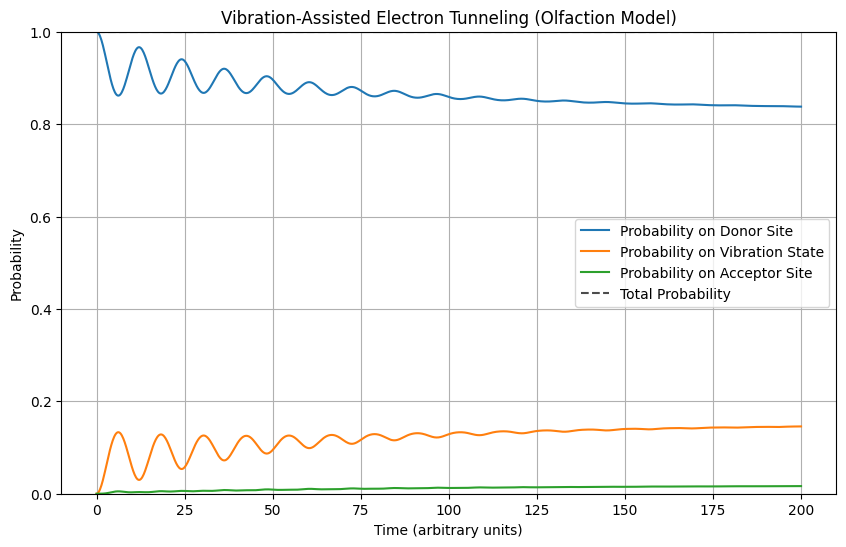


Simulation complete. The plot shows the probability of the electron being on the
donor site, the intermediate vibrational state, or the acceptor site over time.
You should observe the electron's probability transferring from the donor to the acceptor,
with the vibrational state potentially acting as a 'stepping stone' or intermediary.
The total probability will decay due to the damping parameters, mimicking energy loss.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import Qobj, ket, mesolve, basis, qeye, destroy, tensor

# --- 1. Define System Parameters ---
# We'll model a simplified "electron hopping" system involving a molecular vibration.
# The electron can be:
# 1. On the "donor" side (site 0)
# 2. On the "acceptor" side (site 2)
# 3. Interacting with a molecular vibration (site 1, an intermediate energy level)

# Energy levels for our three "sites" (electron states/vibrational state)
E_donor = 0.5    # Energy of the electron on the donor side (arbitrary units)
E_vibration = 0.0 # Energy of the intermediate molecular vibration state (arbitrary units)
E_acceptor = -0.5 # Energy of the electron on the acceptor side (lower energy, where it wants to go)

# Coupling strengths
J_donor_vib = 0.1 # Coupling between donor site and vibrational state
J_vib_acceptor = 0.1 # Coupling between vibrational state and acceptor site

# Damping/Decoherence 
# These rates represent how the electron or vibration loses energy or coherence
# due to interaction with the warm, messy biological environment.
gamma_electron = 0.01 # Decoherence rate for the electron states (donor/acceptor)
gamma_vibration = 0.05 # Decoherence rate for the molecular vibrational state (it loses energy faster)

# Simulation time
t_max = 200 # Maximum time for the simulation
num_points = 1000 # Number of time steps
tlist = np.linspace(0, t_max, num_points) # Array of time points


# --- 2. Define Quantum Operators and States ---
# We're now dealing with a 3-level system: |0> (donor), |1> (vibration), |2> (acceptor)

# Basis states for our three levels
donor_state = basis(3, 0)     # |0>: Electron on donor
vibration_state = basis(3, 1) # |1>: Electron interacting with vibration
acceptor_state = basis(3, 2)  # |2>: Electron on acceptor

# --- 3. Define the Hamiltonian (H) ---
# H = H_energies_of_states + H_coupling_between_states

# H_energies: Individual energies of each state
H_energies = E_donor * donor_state * donor_state.dag() + \
             E_vibration * vibration_state * vibration_state.dag() + \
             E_acceptor * acceptor_state * acceptor_state.dag()

# H_coupling: Coupling between donor-vibration and vibration-acceptor
# This represents the "hopping" or "tunneling" pathways assisted by the vibration.
# Donor <-> Vibration coupling
H_coupling_dv = J_donor_vib * (donor_state * vibration_state.dag() + \
                               vibration_state * donor_state.dag())

# Vibration <-> Acceptor coupling
H_coupling_va = J_vib_acceptor * (vibration_state * acceptor_state.dag() + \
                               acceptor_state * vibration_state.dag())

# Total Hamiltonian
H = H_energies + H_coupling_dv + H_coupling_va

print("Hamiltonian (H):\n", H)

# --- 4. Define Initial State and Collapse Operators ---

# Initial State: Electron starts on the donor side.
psi0 = donor_state # Our starting quantum state |0>

# Collapse operators (c_ops): Model decoherence or energy loss.
# We'll use destroy(3) for general decay within our 3-level system.
# We apply different decay rates for electron-like transitions and vibrational decay.
c_ops = [np.sqrt(gamma_electron) * destroy(3), # General electron decoherence/decay
         np.sqrt(gamma_vibration) * (vibration_state * vibration_state.dag())] # Additional decay for vibration state

# A more refined model would have specific decay channels.
# For simplicity, destroy(3) often acts as a general lowering operator.
# The second term is a population decay from the vibrational level.

# --- 5. Evolve the System in Time ---
# Expectation operators (e_ops): What we want to measure over time.
# We want to track the probability of the electron being on the donor, vibration, or acceptor site.

P_donor = donor_state * donor_state.dag()         # Probability on donor site |0><0|
P_vibration = vibration_state * vibration_state.dag() # Probability on vibration state |1><1|
P_acceptor = acceptor_state * acceptor_state.dag()    # Probability on acceptor site |2><2|

e_ops = [P_donor, P_vibration, P_acceptor]

# Solve the master equation
output = mesolve(H, psi0, tlist, c_ops, e_ops)

# Extract probabilities
prob_donor = output.expect[0]
prob_vibration = output.expect[1]
prob_acceptor = output.expect[2]

# --- 6. Plotting the Results ---
plt.figure(figsize=(10, 6))
plt.plot(tlist, prob_donor, label='Probability on Donor Site')
plt.plot(tlist, prob_vibration, label='Probability on Vibration State')
plt.plot(tlist, prob_acceptor, label='Probability on Acceptor Site')

prob_total = prob_donor + prob_vibration + prob_acceptor
plt.plot(tlist, prob_total, label='Total Probability', linestyle='--', alpha=0.7, color='black')

plt.xlabel('Time (arbitrary units)')
plt.ylabel('Probability')
plt.title('Vibration-Assisted Electron Tunneling (Olfaction Model)')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.show()

print("\nSimulation complete. The plot shows the probability of the electron being on the")
print("donor site, the intermediate vibrational state, or the acceptor site over time.")
print("You should observe the electron's probability transferring from the donor to the acceptor,")
print("with the vibrational state potentially acting as a 'stepping stone' or intermediary.")
print("The total probability will decay due to the damping parameters, mimicking energy loss.")
